In [1]:
import keras
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
y_train.shape

(60000,)

In [5]:
x_test.shape

(10000, 28, 28)

In [6]:
y_train.shape

(60000,)

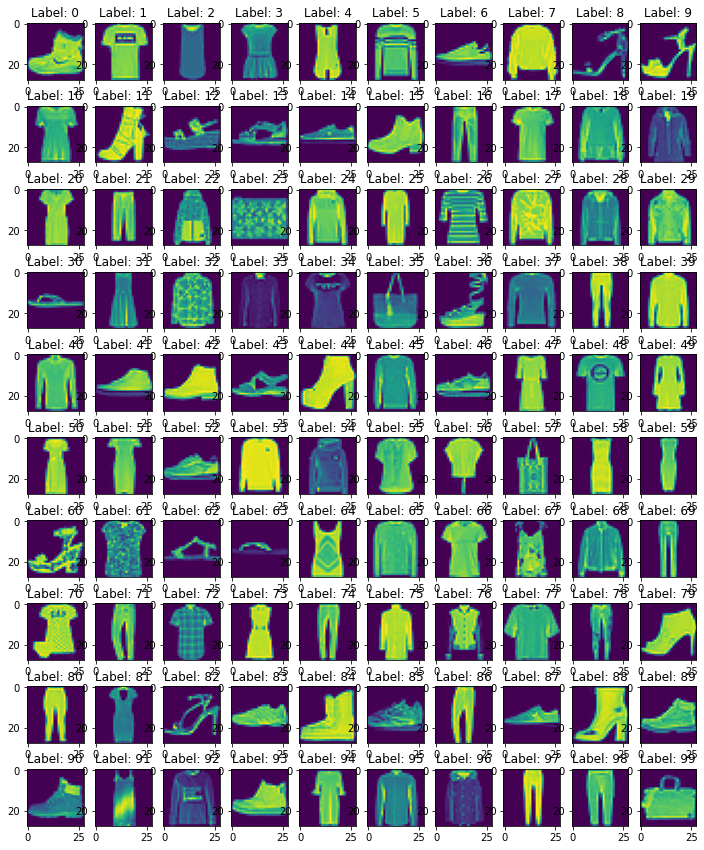

In [7]:
plt.figure(figsize=(12, 15))
for i in range(100):
    plt.subplot(10, 10, i+1)
    plt.title('Label: ' + str(i))
    plt.imshow(x_train[i].reshape(28, 28), cmap=None)

In [9]:
x_train = x_train.reshape((60000, 28 * 28))
x_train = x_train.astype('float32') / 255

x_test = x_test.reshape((10000, 28 * 28))
x_test = x_test.astype('float32') / 255

In [10]:
def plot_history(history):
    # 精度の履歴をプロット
    plt.plot(history.history['accuracy'],"o-",label="accuracy")
    plt.plot(history.history['val_accuracy'],"o-",label="val_acc")
    plt.title('model accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend(loc="lower right")
    plt.show()
 
    # 損失の履歴をプロット
    plt.plot(history.history['loss'],"o-",label="loss",)
    plt.plot(history.history['val_loss'],"o-",label="val_loss")
    plt.title('model loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(loc='lower right')
    plt.show()

In [11]:
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout
from keras.optimizers import RMSprop

In [12]:
model = keras.models.Sequential()

In [13]:
model.add(Dense(units=1024, input_dim=28*28))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(units=256))
model.add(Activation('softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])

In [14]:
history = model.fit(x_train, y_train, batch_size=64, epochs=50, verbose=1, validation_data=(x_test, y_test))

Epoch 1/50
938/938 [==============================] - 11s 12ms/step - loss: 1.2343 - accuracy: 0.6169 - val_loss: 0.6892 - val_accuracy: 0.7566
Epoch 2/50
938/938 [==============================] - 12s 13ms/step - loss: 0.6173 - accuracy: 0.7757 - val_loss: 0.5765 - val_accuracy: 0.7886
Epoch 3/50
938/938 [==============================] - 14s 15ms/step - loss: 0.5387 - accuracy: 0.8055 - val_loss: 0.5386 - val_accuracy: 0.8048
Epoch 4/50
938/938 [==============================] - 12s 13ms/step - loss: 0.4978 - accuracy: 0.8219 - val_loss: 0.5012 - val_accuracy: 0.8205
Epoch 5/50
938/938 [==============================] - 11s 12ms/step - loss: 0.4699 - accuracy: 0.8343 - val_loss: 0.4828 - val_accuracy: 0.8277
Epoch 6/50
938/938 [==============================] - 11s 12ms/step - loss: 0.4506 - accuracy: 0.8398 - val_loss: 0.4740 - val_accuracy: 0.8297
Epoch 7/50
938/938 [==============================] - 12s 12ms/step - loss: 0.4357 - accuracy: 0.8451 - val_loss: 0.4549 - val_accuracy:

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1024)              803840    
_________________________________________________________________
activation (Activation)      (None, 1024)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               262400    
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0         
Total params: 1,066,240
Trainable params: 1,066,240
Non-trainable params: 0
_________________________________________________________________


In [19]:
vector_array = model.predict(x_test)

In [22]:
vector_array.shape

(10000, 256)

In [23]:
import faiss

In [24]:
index = faiss.IndexFlatL2(256)

In [25]:
faiss.normalize_L2(vector_array)

In [26]:
index.add(vector_array)

In [27]:
result = index.search(vector_array, k=10)

<ipython-input-29-7bef840f2e3e>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(1, 1))


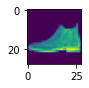

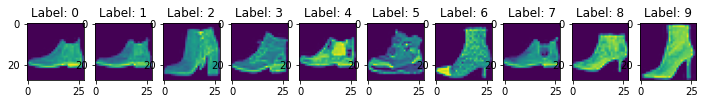

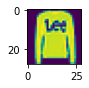

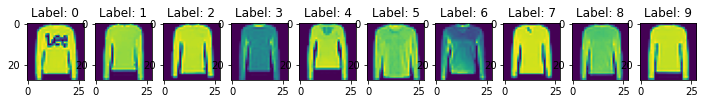

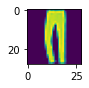

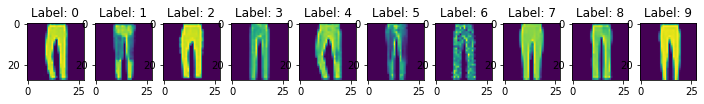

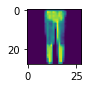

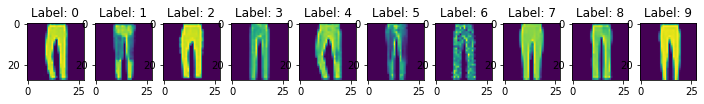

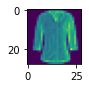

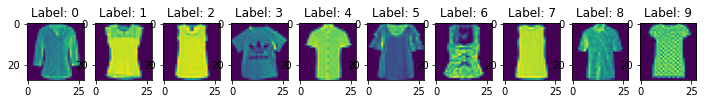

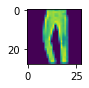

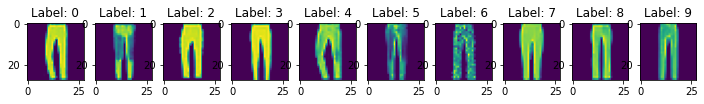

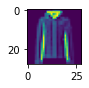

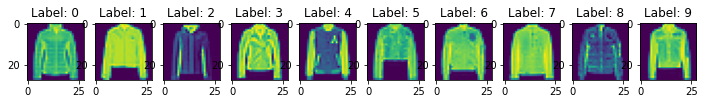

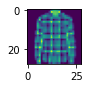

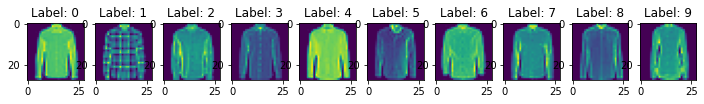

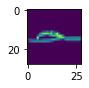

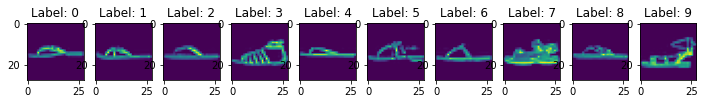

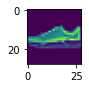

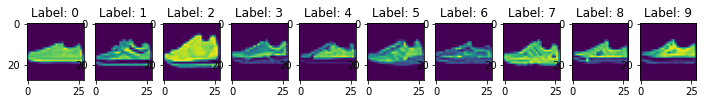

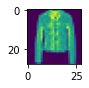

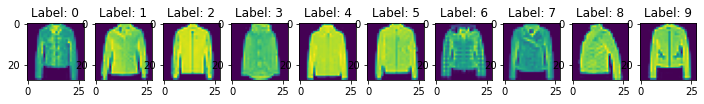

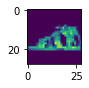

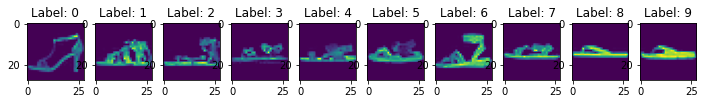

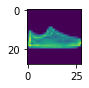

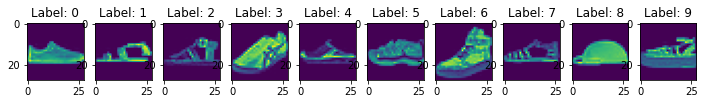

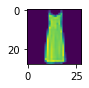

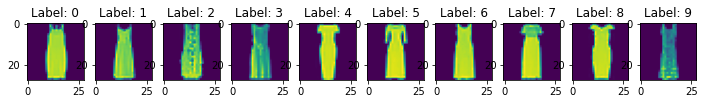

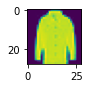

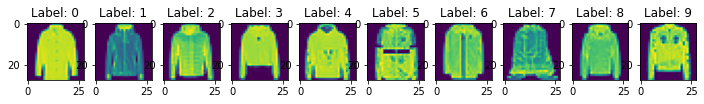

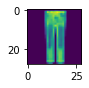

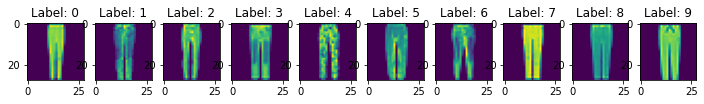

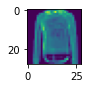

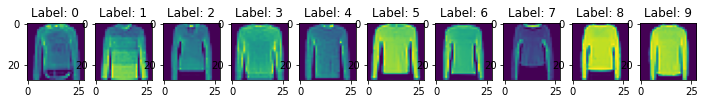

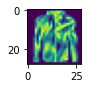

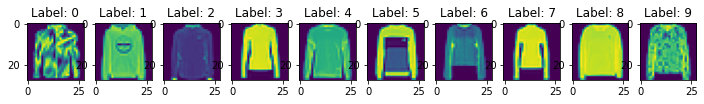

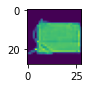

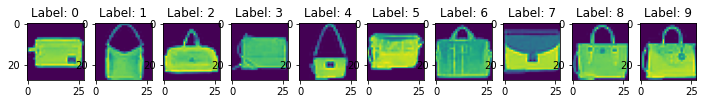

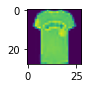

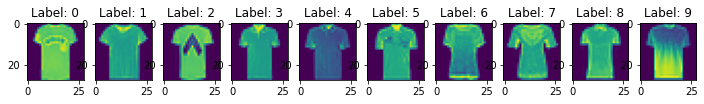

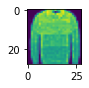

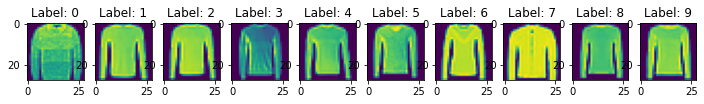

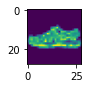

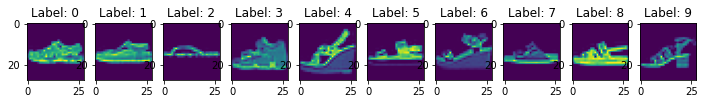

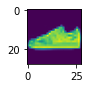

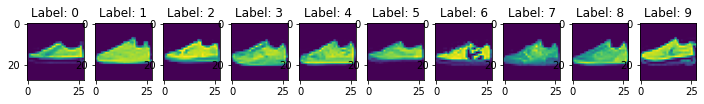

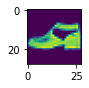

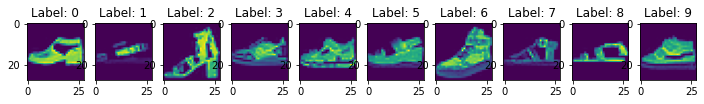

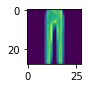

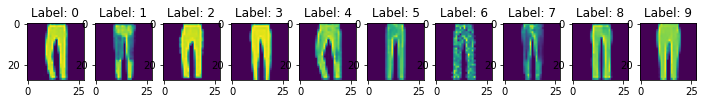

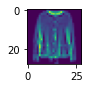

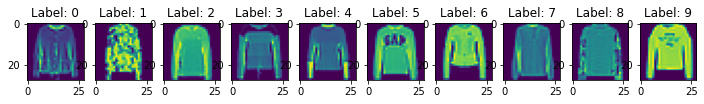

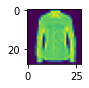

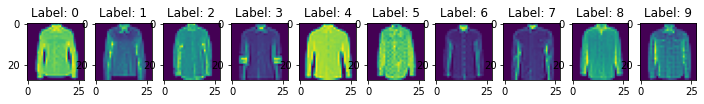

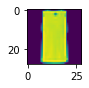

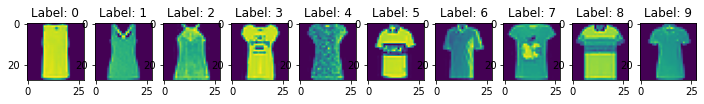

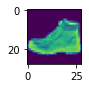

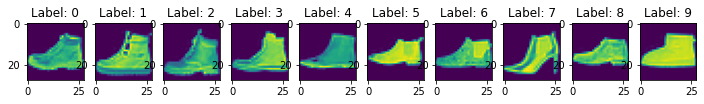

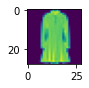

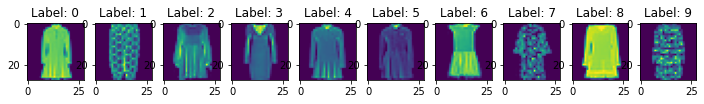

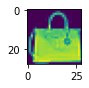

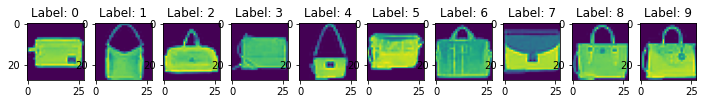

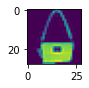

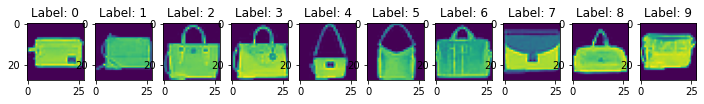

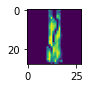

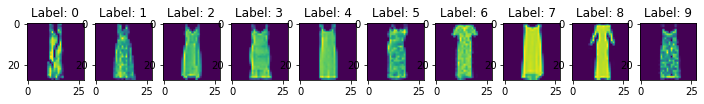

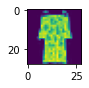

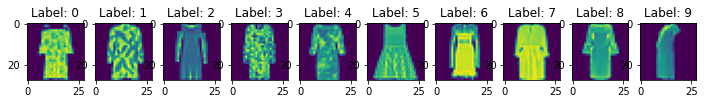

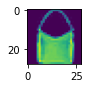

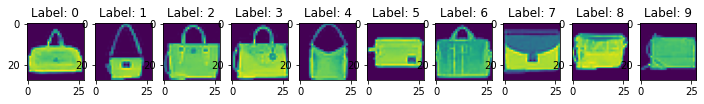

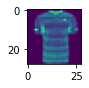

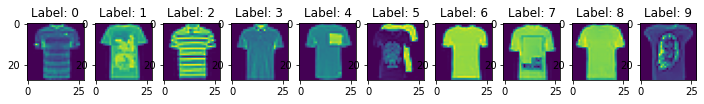

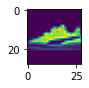

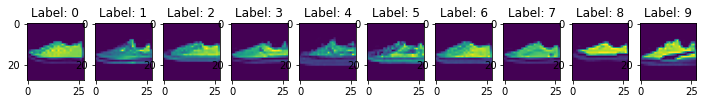

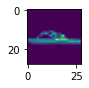

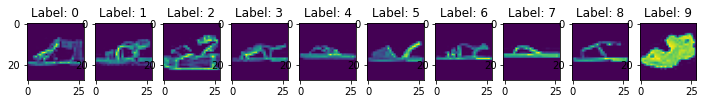

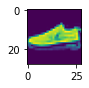

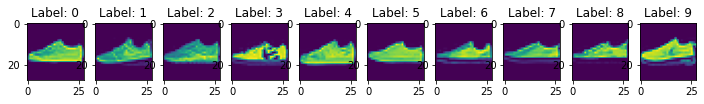

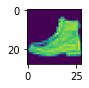

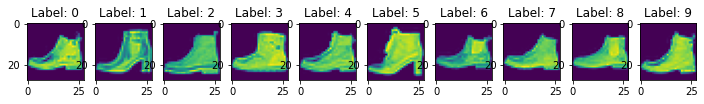

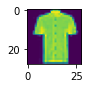

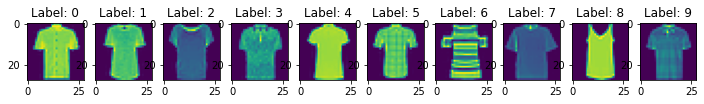

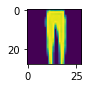

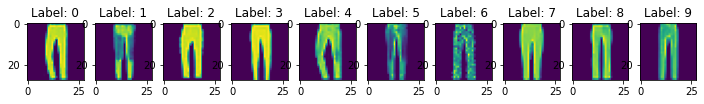

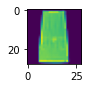

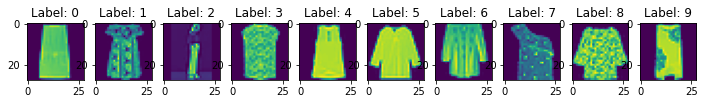

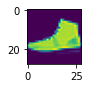

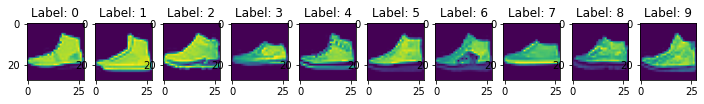

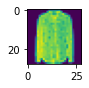

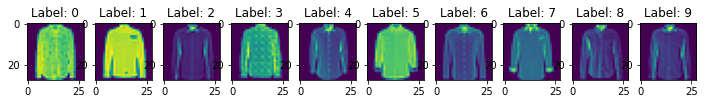

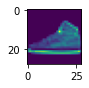

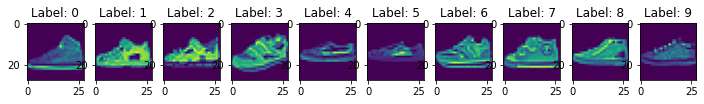

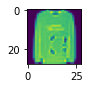

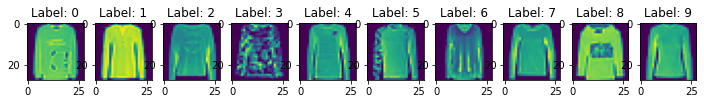

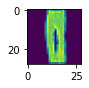

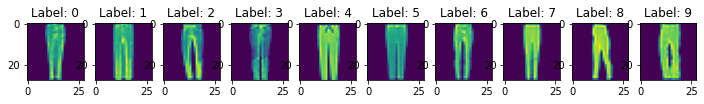

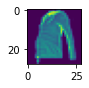

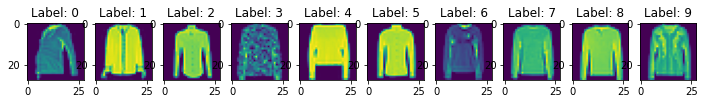

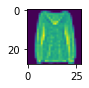

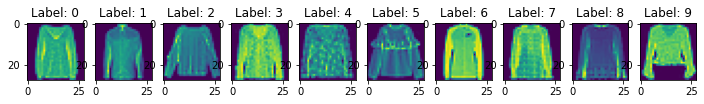

In [29]:
for y in range(50):
    plt.figure(figsize=(1, 1))
    plt.imshow(x_test[y].reshape(28, 28))
    plt.figure(figsize=(12, 15))
    for z, i in enumerate(result[1][y]):
        plt.subplot(10, 10, z+1)
        plt.title('Label: ' + str(z))
        plt.imshow(x_test[i].reshape(28, 28), cmap=None)